In [ ]:
!pip install linearmodels

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from scipy.stats import chi2
import statsmodels.formula.api as smf

In [ ]:
import pandas as pd

# Load the spreadsheet
file_path = '/content/data_ekonom.xlsx'
excel_data = pd.ExcelFile(file_path)

# Check sheet names to understand the structure of the file
excel_data.sheet_names

['PDRB', 'PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit', 'pooled']

# Pooled

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects

# Load the Excel file
file_path = '/content/data_ekonom.xlsx'
xls = pd.ExcelFile(file_path)

# Read the 'pooled-2014' sheet into a pandas DataFrame
df = pd.read_excel(xls, sheet_name='pooled')

# Transformasi logaritma natural untuk variabel independen dan dependen
independent_variables = ['PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit']
for var in independent_variables:
    df[f'ln_{var}'] = np.log(df[var])

# Transformasi log untuk variabel dependen
df['ln_PDRB'] = np.log(df['PDRB'])

# Tentukan variabel dependen dan independen
dependent_variable = df['ln_PDRB']
independent_variable_ln = df[['ln_PAD', 'ln_Kerja_Umur15', 'ln_Tabungan', 'ln_Kredit']]

# Tambahkan konstanta ke variabel independen
independent_variable_ln = sm.add_constant(independent_variable_ln)

# Fit model OLS menggunakan variabel independen yang sudah di-ln
model_OLS_ln = sm.OLS(dependent_variable, independent_variable_ln).fit()

# Tampilkan ringkasan hasil model
print(model_OLS_ln.summary())


                            OLS Regression Results                            
Dep. Variable:                ln_PDRB   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.36e-62
Time:                        01:53:43   Log-Likelihood:                -19.096
No. Observations:                 175   AIC:                             48.19
Df Residuals:                     170   BIC:                             64.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3735      0.637     

# FEM

FEM time

In [ ]:
import numpy as np
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from scipy.stats import chi2

# Transformasi logaritma natural untuk variabel independen dan dependen
independent_variables = ['PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit']
for var in independent_variables:
    df[f'ln_{var}'] = np.log(df[var])

# Transformasi log untuk variabel dependen
df['ln_PDRB'] = np.log(df['PDRB'])

# Atur indeks panel data
df = df.reset_index()
df = df.set_index(['Kabupaten', 'Tahun'])

# Formula regresi
formula = "ln_PDRB ~ " + " + ".join([f'ln_{var}' for var in independent_variables]) + " + TimeEffects"

# Estimasi model Fixed Effects (FEM)
model_fem_time = PanelOLS.from_formula(formula, df)
results_fem_time = model_fem_time.fit(cov_type='clustered', cluster_entity=True)

In [ ]:
print(results_fem_time)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ln_PDRB   R-squared:                        0.8285
Estimator:                   PanelOLS   R-squared (Between):              0.9899
No. Observations:                 175   R-squared (Within):              -14.949
Date:                Mon, Dec 23 2024   R-squared (Overall):              0.9896
Time:                        01:53:45   Log-likelihood                   -14.683
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      200.51
Entities:                          35   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                   F(4,166)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             44.411
                            

FEM indv

In [ ]:
# Transformasi logaritma natural untuk variabel independen dan dependen
independent_variables = ['PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit']
for var in independent_variables:
    df[f'ln_{var}'] = np.log(df[var])

df['ln_PDRB'] = np.log(df['PDRB'])

# Atur indeks panel data
df = df.reset_index()
df = df.set_index(['Kabupaten', 'Tahun'])

formula = "ln_PDRB ~ " + " + ".join([f'ln_{var}' for var in independent_variables]) + " + EntityEffects"

model_fem_indv = PanelOLS.from_formula(formula, df)
results_fem_indv = model_fem_indv.fit(cov_type='clustered', cluster_entity=True)

print(results_fem_indv.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ln_PDRB   R-squared:                        0.9237
Estimator:                   PanelOLS   R-squared (Between):              0.5596
No. Observations:                 175   R-squared (Within):               0.9237
Date:                Mon, Dec 23 2024   R-squared (Overall):              0.5596
Time:                        02:02:44   Log-likelihood                    433.25
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      411.38
Entities:                          35   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                   F(4,136)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             273.14
                            

Dengan detail intercept sebagai berikut

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Define the regression formula using the ln-transformed variables
formula = "ln_PDRB ~ ln_PAD + ln_Kerja_Umur15 + ln_Tabungan + ln_Kredit + C(Kabupaten)"

# Reset the index to make 'Kabupaten' and 'Tahun' columns
df = df.reset_index()

#  Fixed Effects Model (FEM) menggunakan OLS
model_fem = smf.ols(formula=formula, data=df)
results_fem = model_fem.fit()

# Tampilkan ringkasan hasil model
print(results_fem.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_PDRB   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3533.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          3.40e-186
Time:                        01:54:04   Log-Likelihood:                 433.25
No. Observations:                 175   AIC:                            -788.5
Df Residuals:                     136   BIC:                            -665.1
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

FEM both

In [ ]:
# Transformasi logaritma natural untuk variabel independen dan dependen
independent_variables = ['PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit']
for var in independent_variables:
    df[f'ln_{var}'] = np.log(df[var])

# Transformasi log untuk variabel dependen
df['ln_PDRB'] = np.log(df['PDRB'])

# Atur indeks panel data
df = df.reset_index()
df = df.set_index(['Kabupaten', 'Tahun'])

# Formula regresi
formula = "ln_PDRB ~ " + " + ".join([f'ln_{var}' for var in independent_variables]) + " + EntityEffects + TimeEffects"

# Estimasi model Fixed Effects (FEM)
model_fem_both = PanelOLS.from_formula(formula, df)
results_fem_both = model_fem_both.fit(cov_type='clustered', cluster_entity=True)
print(results_fem_both)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ln_PDRB   R-squared:                        0.0865
Estimator:                   PanelOLS   R-squared (Between):              0.0758
No. Observations:                 175   R-squared (Within):               0.2266
Date:                Mon, Dec 23 2024   R-squared (Overall):              0.0758
Time:                        01:55:07   Log-likelihood                    597.28
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.1248
Entities:                          35   P-value                           0.0171
Avg Obs:                       5.0000   Distribution:                   F(4,132)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             4.7795
                            

In [ ]:
# Tampilkan semua atribut yang tersedia dalam objek hasil model
print(dir(results_fem_time))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_c2b', '_c2o', '_c2w', '_cov_type', '_datetime', '_debiased', '_deferred_cov', '_df_model', '_df_resid', '_effects', '_entity_effect', '_entity_info', '_f_info', '_f_pooled', '_f_stat', '_fitted', '_idiosyncratic', '_index', '_loglik', '_name', '_nobs', '_not_null', '_original_index', '_other_effect', '_other_info', '_out_of_sample', '_params', '_r2', '_r2_ex_effects', '_r2b', '_r2o', '_r2w', '_repr_html_', '_resids', '_residual_ss', '_rho', '_s2', '_sigma2_effects', '_sigma2_eps', '_time_effect', '_time_info', '_total_ss', '_var_names', '_wresids', 'conf_int', 'corr_squared_between', 'corr_squared_overall', 'corr_squared_within', 'cov', 'df_mode

In [ ]:
# Jumlah parameter (k) dan jumlah observasi (n) dari setiap model
k_fem_time = results_fem_time.params.shape[0]  # Jumlah parameter model FEM_Time
k_fem_indv = results_fem_indv.params.shape[0]  # Jumlah parameter model FEM_Entity
k_fem_both = results_fem_both.params.shape[0]  # Jumlah parameter model FEM_Both

n_fem_time = results_fem_time.nobs  # Jumlah observasi model FEM_Time
n_fem_indv = results_fem_indv.nobs  # Jumlah observasi model FEM_Entity
n_fem_both = results_fem_both.nobs  # Jumlah observasi model FEM_Both

# Log-likelihood dari setiap model
loglik_fem_time = results_fem_time.loglik
loglik_fem_indv = results_fem_indv.loglik
loglik_fem_both = results_fem_both.loglik

# Hitung AIC dan BIC secara manual
aic_fem_time = -2 * loglik_fem_time + 2 * k_fem_time
aic_fem_indv = -2 * loglik_fem_indv + 2 * k_fem_indv
aic_fem_both = -2 * loglik_fem_both + 2 * k_fem_both

bic_fem_time = -2 * loglik_fem_time + k_fem_time * np.log(n_fem_time)
bic_fem_indv = -2 * loglik_fem_indv + k_fem_indv * np.log(n_fem_indv)
bic_fem_both = -2 * loglik_fem_both + k_fem_both * np.log(n_fem_both)

# Ringkasan hasil model dalam bentuk tabel
results_comparison = pd.DataFrame({
    "Model": ["FEM_Time", "FEM_Entity", "FEM_Both"],
    "R²_within": [results_fem_time.rsquared_within, results_fem_indv.rsquared_within, results_fem_both.rsquared_within],
    "R²_between": [results_fem_time.rsquared_between, results_fem_indv.rsquared_between, results_fem_both.rsquared_between],
    "R²_overall": [results_fem_time.rsquared_overall, results_fem_indv.rsquared_overall, results_fem_both.rsquared_overall],
    "Log-Likelihood": [loglik_fem_time, loglik_fem_indv, loglik_fem_both],
    "AIC": [aic_fem_time, aic_fem_indv, aic_fem_both],
    "BIC": [bic_fem_time, bic_fem_indv, bic_fem_both]
})

# Tampilkan tabel hasil
print("Perbandingan Model FEM:")
results_comparison

Perbandingan Model FEM:


,Model,R²_within,R²_between,R²_overall,Log-Likelihood,AIC,BIC
0,FEM_Time,-14.948546,0.989877,0.989564,-14.682983,37.365965,50.025109
1,FEM_Entity,0.923661,0.559569,0.559577,433.251862,-858.503723,-845.844580
2,FEM_Both,0.226616,0.075766,0.075769,597.281492,-1186.562983,-1173.903840


* Within: Mengukur variansi dalam individu (fixed effects).
* Between: Mengukur variansi antar individu (cross-sectional).
* Overall: Mengukur variansi total, mencakup within dan between.

Jika R²_within negatif:

1. Efek tetap individu danatau efek tetap waktu mungkin tidak signifikan atau tidak relevan dalam menjelaskan variabel dependen.
2. Model mungkin mengalami overfitting karena terlalu banyak parameter dummy yang ditambahkan.
3. Kombinasi efek tetap individu dan waktu sekaligus mungkin menyebabkan redundansi, terutama jika variabel independen sudah menjelaskan sebagian besar variasi data.

pilih FEM_entity atau model_fem_indv

# REM

In [ ]:
formula = "ln_PDRB ~ " + " + ".join([f'ln_{var}' for var in independent_variables]) + " + EntityEffects + TimeEffects"
model_rem_2way = RandomEffects.from_formula(formula, df)
results_rem_2way = model_rem_2way.fit()

print(results_rem_2way)

                        RandomEffects Estimation Summary                        
Dep. Variable:                ln_PDRB   R-squared:                        0.9968
Estimator:              RandomEffects   R-squared (Between):              0.9996
No. Observations:                 175   R-squared (Within):               0.8061
Date:                Tue, Dec 17 2024   R-squared (Overall):              0.9996
Time:                        11:01:11   Log-likelihood                    339.89
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.345e+04
Entities:                          35   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                   F(4,171)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):          1.345e+04
                            

# Comparison fem rem pooled

In [ ]:
# model_OLS_ln = sm.OLS(dependent_variable, independent_variable_ln).fit()

In [ ]:
# Estimasi model Fixed Effects (FEM)
# model_fem_indv = PanelOLS.from_formula(formula, df)
# results_fem_indv = model_fem_indv.fit(cov_type='clustered', cluster_entity=True)

In [ ]:
# model_rem_2way = RandomEffects.from_formula(formula, df)
# results_rem_2way = model_rem_2way.fit()

1. FEM vs OLS

In [ ]:
import numpy as np
from scipy.stats import f

# Pastikan multi-index untuk data panel
# df = df.set_index(['Kabupaten', 'Tahun'])

# Jumlah individu (N) dan waktu (T)
N = df.index.get_level_values(0).nunique()  # Banyak individu (Kabupaten)
T = df.index.get_level_values(1).nunique()  # Banyak waktu (Tahun)
NT = len(df)  # Total observasi

# Model OLS (Tanpa Efek Tetap)
X_ols = sm.add_constant(df[['ln_PAD', 'ln_Kerja_Umur15', 'ln_Tabungan', 'ln_Kredit']])
y_ols = df['ln_PDRB']
model_ols = sm.OLS(y_ols, X_ols).fit()
RSS_OLS = np.sum(model_ols.resid ** 2)

# Model Fixed Effects (FEM)
formula_fem = "ln_PDRB ~ ln_PAD + ln_Kerja_Umur15 + ln_Tabungan + ln_Kredit + EntityEffects"
model_fem = PanelOLS.from_formula(formula_fem, df)
results_fem = model_fem.fit()
RSS_FEM = np.sum(results_fem.resids ** 2)

# Hitung F-Statistic
numerator = (RSS_OLS - RSS_FEM) / (N - 1)
denominator = RSS_FEM / (NT - N - len(results_fem.params))
F_statistic = numerator / denominator

# Hitung p-value dari distribusi F
df1 = N - 1  # Derajat bebas pembilang
df2 = NT - N - len(results_fem.params)  # Derajat bebas penyebut
p_value = 1 - f.cdf(F_statistic, df1, df2)

# Tampilkan hasil uji F
print("\nHasil Uji F untuk FEM vs OLS:")
print(f"F-statistic: {F_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretasi hasil
if p_value < 0.05:
    print("H0 ditolak: Model Fixed Effects lebih baik dibandingkan OLS.")
else:
    print("H0 tidak ditolak: Model OLS lebih baik atau sama dengan Fixed Effects.")


Hasil Uji F untuk FEM vs OLS:
F-statistic: 699.4442
P-value: 0.0000
H0 ditolak: Model Fixed Effects lebih baik dibandingkan OLS.


2. REM vs OLS

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from linearmodels.panel import RandomEffects
from linearmodels.panel import PanelOLS
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import RandomEffects
from linearmodels.panel import PanelOLS
from scipy.stats import chi2

In [ ]:
from scipy.stats import chi2

# Ambil R-squared dari model OLS_ln (OLS dengan transformasi log)
r_squared_ols_ln = model_OLS_ln.rsquared

# Ambil R-squared dari model Random Effects (REM 2-way)
r_squared_rem_2way = results_rem_2way.rsquared

# Hitung Honda Test Statistic
honda_statistic = (r_squared_rem_2way - r_squared_ols_ln) / (1 - r_squared_ols_ln)

# Hitung p-value dari distribusi chi-square dengan 1 derajat kebebasan
p_value_honda = 1 - chi2.cdf(honda_statistic, df=1)

# Tampilkan hasil uji Honda
print(f"\nHonda Test Statistic: {honda_statistic:.4f}")
print(f"P-Value: {p_value_honda:.4f}")

# Interpretasi hasil
if p_value_honda < 0.05:
    print("Model REM lebih baik dibandingkan OLS berdasarkan uji Honda.")
else:
    print("Model OLS mungkin sudah cukup.")


Honda Test Statistic: 0.9822
P-Value: 0.3217
Model OLS mungkin sudah cukup.


3. REM vs FEM

In [ ]:
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv

# Estimasi model Random Effects (REM 2-way)
formula = "ln_PDRB ~ ln_PAD + ln_Kerja_Umur15 + ln_Tabungan + ln_Kredit + EntityEffects + TimeEffects"
model_rem_2way = RandomEffects.from_formula(formula, df)
results_rem_2way = model_rem_2way.fit()

# Estimasi model Fixed Effects (FEM)
model_fem = PanelOLS.from_formula("ln_PDRB ~ ln_PAD + ln_Kerja_Umur15 + ln_Tabungan + ln_Kredit + EntityEffects", df)
results_fem_indv = model_fem_indv.fit(cov_type='clustered', cluster_entity=True)

# Koefisien dan matriks kovarians untuk FEM dan REM
b_FEM = results_fem.params
b_REM = results_rem_2way.params

cov_b_FEM = results_fem_indv.cov
cov_b_REM = results_rem_2way.cov

# Perhitungan statistik uji Hausman
diff_b = b_FEM - b_REM
cov_diff = cov_b_FEM + cov_b_REM

# Periksa apakah matriks kovarian dapat diinvers
try:
    hausman_stat = np.dot(diff_b.T, inv(cov_diff)).dot(diff_b)
    df_hausman = len(b_FEM)  # Jumlah parameter
    p_value_hausman = 1 - chi2.cdf(hausman_stat, df_hausman)

    # Tampilkan hasil uji Hausman
    print(f"\nHausman Test Statistic: {hausman_stat:.4f}")
    print(f"P-Value: {p_value_hausman:.4f}")

    # Interpretasi hasil
    if p_value_hausman < 0.05:
        print("Model FEM lebih tepat dibandingkan REM berdasarkan uji Hausman.")
    else:
        print("Model REM lebih efisien dibandingkan FEM berdasarkan uji Hausman.")

except np.linalg.LinAlgError:
    print("Matriks kovarian tidak dapat diinvers. Uji Hausman gagal dilakukan.")


Hausman Test Statistic: 115.8481
P-Value: 0.0000
Model FEM lebih tepat dibandingkan REM berdasarkan uji Hausman.


Dipilih FEM

# Asumsi Klasik FEM

=== UJI NORMALITAS RESIDUAL ===
Shapiro-Wilk Test Statistic: 0.9786

=== UJI AUTOKORELASI RESIDUAL ===
Durbin-Watson Statistic: 1.6326
Tidak ada autokorelasi residual.

=== UJI HETEROSKEDASTISITAS ===

Goldfeld-Quandt Test Results:
GQ Statistic: 0.0000
Fail to reject the null hypothesis: No heteroscedasticity is detected.


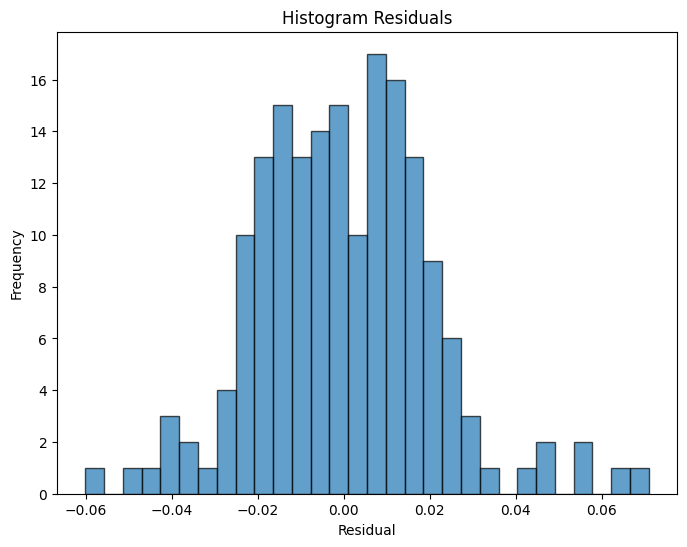

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pastikan model sudah dijalankan
model_fem = PanelOLS.from_formula("ln_PDRB ~ ln_PAD + ln_Kerja_Umur15 + ln_Tabungan + ln_Kredit + EntityEffects", df)
results_fem = model_fem.fit(cov_type='clustered', cluster_entity=True)

# Ambil residual dari model FEM
residuals = results_fem.resids

# 1. UJI NORMALITAS RESIDUAL
print("=== UJI NORMALITAS RESIDUAL ===")
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")

# 2. UJI AUTOKORELASI RESIDUAL (Durbin-Watson Test)
print("\n=== UJI AUTOKORELASI RESIDUAL ===")
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
if 1.5 <= dw_statistic <= 2.5:
    print("Tidak ada autokorelasi residual.")
else:
    print("Ada indikasi autokorelasi residual.")

# 3. UJI HETEROSKEDASTISITAS (Breusch-Pagan Test)
print("\n=== UJI HETEROSKEDASTISITAS ===")
import statsmodels.api as sm

# Sort the data by the predicted values
residuals = results_fem_indv.resids
# Access dependent variable values using .dataframe attribute instead of .values
dependent_variable = results_fem_indv.model.dependent.dataframe.values
sorted_data = sorted(zip(results_fem_indv.fitted_values, residuals), key=lambda x: x[0])
fitted_values_sorted, residuals_sorted = zip(*sorted_data)

# Split the data into two halves
split_point = len(residuals_sorted) // 2
residuals_part1 = np.array(residuals_sorted[:split_point])
residuals_part2 = np.array(residuals_sorted[split_point:])

# Calculate the sum of squared residuals for each part
rss1 = np.sum(residuals_part1**2)
rss2 = np.sum(residuals_part2**2)

# Calculate the Goldfeld-Quandt statistic
gq_statistic = rss1 / rss2

# Get the degrees of freedom for each part
df1 = len(residuals_part1) - 1
df2 = len(residuals_part2) - 1

from scipy.stats import f  # Import f for F-distribution
p_value = 1 - f.cdf(gq_statistic, df1, df2)

# Print the results
print("\nGoldfeld-Quandt Test Results:")
print(f"GQ Statistic: {gq_statistic:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis: No heteroscedasticity is detected.")

# 4. UJI MULTIKOLINEARITAS (VIF)
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Variabel independen dengan transformasi logaritma natural
independent_variables_ln = [f'ln_{var}' for var in ['PAD', 'Kerja_Umur15', 'Tabungan', 'Kredit']]

# Ambil data hanya untuk variabel independen
X_vif = df[independent_variables_ln]

# Tambahkan konstanta ke data independen untuk perhitungan VIF
X_vif_with_const = sm.add_constant(X_vif)

# Hitung VIF untuk setiap variabel
vif = pd.DataFrame()
vif['Variable'] = X_vif_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_vif_with_const.values, i) for i in range(X_vif_with_const.shape[1])]

# Visualisasi Residual untuk Normalitas
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("\n=== UJI MULTIKOLINEARITAS ===")
print("Hasil Uji VIF untuk Variabel Independen:")
vif


=== UJI MULTIKOLINEARITAS ===
Hasil Uji VIF untuk Variabel Independen:


,Variable,VIF
0,const,947.681792
1,ln_PAD,1.011387
2,ln_Kerja_Umur15,1.153318
3,ln_Tabungan,3.273319
4,ln_Kredit,3.505051
